In [12]:
import pandas as pd
from collections import Counter
from itertools import chain
import pm4py

In [13]:
df_verslagen = pd.read_csv('event_log_test.csv')
df_verslagen = pd.read_csv('event_log_test_per_report.csv')
df_verslagen.head()

,pseudo_id,verslagen_report_tags,verslagen_report_content,verslagen_report_start_date,date,alltext,tokens,text,Topic,Tags,Keywords,new_topic_label,verslagen_report_tags_new_topic_label
0,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Klinische Brief,"Dhr. A.J. Dingemans, huisarts\r\n[STREETNAME] ...",2020-11-26 15:06:00,2020-11-26 15:06:00,dhr aj dingemans huisarts streetnaam city datu...,"['aj', 'dingemans', 'streetnaam', 'Kenmerk', '...",aj dingemans streetnaam Kenmerk patientid betr...,1,['Topic 1'],"['oraal stuk', 'tablet oraal', 'tablet oraal s...",Oral Medication,Klinische Brief | Oral Medication
1,088C9FD98B8B2CBCB597C17C07AC1845B21F0849,Klinische Brief,"Mw. C.M. Staal, huisarts\r\n[STREETNAME] RE [...",2023-01-29 12:08:00,2023-01-29 12:08:00,mw cm staal huisarts streetname re city datum ...,"['cm', 'staal', 're', 'kenmerk', 'patientid', ...",cm staal re kenmerk patientid betreffen heer i...,-1,['Topic -1'],[],Outlier,Klinische Brief | Outlier
2,088C9FD98B8B2CBCB597C17C07AC1845B21F0849,Klinische Brief,"Mw. C.M. Staal, huisarts\r\n[STREETNAME] RE [...",2023-01-20 11:53:00,2023-01-20 11:53:00,mw cm staal huisarts streetname re city datum ...,"['cm', 'staal', 're', 'kenmerk', 'patientid', ...",cm staal re kenmerk patientid betreffen heer i...,-1,['Topic -1'],[],Outlier,Klinische Brief | Outlier
3,088C9FD98B8B2CBCB597C17C07AC1845B21F0849,Klinische Brief,"Mw. C.M. Staal, huisarts\r\nFransebaan 586\r\n...",2017-11-13 18:22:00,2017-11-13 18:22:00,mw cm staal huisarts fransebaan re city datum ...,"['cm', 'staal', 'fransebaan', 're', 'kenmerk',...",cm staal fransebaan re kenmerk patientid betre...,1,['Topic 1'],"['oraal stuk', 'tablet oraal', 'tablet oraal s...",Oral Medication,Klinische Brief | Oral Medication
4,0A5645E02FA818D1629926B6BEFA81CF91C25A46,Klinische Brief,Aan de weledelgeleerde heer\r\ndrs. L.J.A.L. H...,2021-01-21 18:32:00,2021-01-21 18:32:00,weledelgeleer heer drs ljal hendrikx huisarts ...,"['weledelgeleer', 'heer', 'drs', 'ljal', 'hend...",weledelgeleer heer drs ljal hendrikx groenstra...,0,['Topic 0'],"['oraal stuk', 'tablet oraal', 'tablet oraal s...",Oral Meds & Documentation,Klinische Brief | Oral Meds & Documentation


In [14]:
df_verslagen['event_tag'] = df_verslagen['verslagen_report_tags_new_topic_label']



In [15]:
import pandas as pd

# Define the data
new_labels = [
    [0, "['oraal stuk', 'tablet oraal', 'tablet oraal stuk', 'mcv fl', 'vriendelijk groet']", "Oral Medication"],
    [1, "[]", "Outlier"],
    [2, "['oraal stuk', 'tablet oraal', 'tablet oraal stuk', 'mcv fl', 'document vervangen document']", "Oral Meds & Documentation"],
    [3, "['aanvullen onderzoek', 'rectaal bloedverlie', 'lichamelijk onderzoek', 'beloop vpk', 'hd stabiel']", "GI Bleed Assessment"],
    [4, "['int knoppen', 'decursus type decursus', 'decursus type', 'knoppen int', 'type decursus']", "Note Types"],
    [5, "['decursus podo decursus', 'decursus podo', 'podo decursus', 'uitvoeren controle', 'controle decursus podo']", "Podiatry Follow-up"],
    [6, "['oraal stuk', 'tablet oraal', 'tablet oraal stuk', 'streetnaam zip', 'geacht collega']", "Oral Meds & Correspondence"],
    [7, "['gastroscopie betreffen', 'collega gastroscopie uitvoeren', 'collega gastroscopie', 'gastroscopie uitvoeren', 'geacht collega gastroscopie']", "Gastroscopy Request"],
    [8, "['oraal stuk', 'tablet oraal', 'tablet oraal stuk', 'spoedeisen hulp', 'rectaal bloedverlie']", "GI Emergency"],
    [9, "['oraal stuk', 'tablet oraal', 'tablet oraal stuk', 'zwart ontlasting', 'angiodysplasie jejunum']", "GI Bleed (Jejunum)"],
    [10, "['reden komst', 'oraal stuk', 'komst verwijzing', 'aanvullen onderzoek', 'lichamelijk onderzoek']", "Intake & Initial Assessment"],
    [11, "['sputovamo leeftijd', 'medisch dossier', 'triage nee', 'naam functie', 'toediening medicatie']", "Patient Intake"],
    [12, "['beloop verpleegkundig', 'soort infuus medicatie', 'infuus medicatie', 'vocht toediening soort', 'vocht toediening']", "Infusion & Fluid Management"],
    [13, "['indicatie aanvraag', 'asa klasse', 'antibiotisch profylaxe', 'antibiotisch profylaxe nvt', 'profylaxe nvt']", "Surgical Prophylaxis"],
    [14, "['lab diana', 'tevoren lab', 'diana lab', 'lab int', 'lab oz']", "Lab Requests"],
    [15, "['aantal controle', 'controle controle', 'mdlarts aantal', 'controle aantal', 'controle aantal controle']", "Follow-up Planning"],
    [16, "['diabete mellitus', 'communicatie specialistisch', 'specialistisch verpleegkundigen communicatie', 'communicatie specialistisch verpleegkundigen', 'verpleegkundigen communicatie']", "Diabetes & Specialist Communication"],
    [17, "['diabete lunch', 'diabete lunch slapen', 'lunch slapen', 'basisdosering diabete lunch', 'basisdosering diabete']", "Diabetes Lifestyle Planning"],
    [18, "['oraal stuk', 'reden komst', 'int knoppen', 'arts assistent', 'rectaal bloedverlie']", "Initial Triage"],
    [19, "['anemie wd', 'actief bloeding', 'streef hb', 'anemie hb', 'dun darm']", "Anemia & GI Bleed"],
    [20, "['overig actie', 'knoppen consult', 'lichamelijk onderzoek', 'consult knoppen', 'knoppen consult knoppen']", "Consultation Workflow"],
    [21, "['diabete mellitus', 'oraal stuk', 'diabete vpk', 'mellitus type', 'diabete mellitus type']", "Diabetes Medication"],
    [22, "['intern geneeskun', 'opname intern geneeskun', 'opname intern', 'secundair hyperparathyreoïdie', 'status niertransplantatie']", "Internal Medicine Admission"],
    [23, "['oraal stuk', 'lichamelijk onderzoek', 'overig actie', 'reden komst', 'gewicht kg']", "Admission Assessment"],
    [24, "['intake type', 'intake type consult', 'consult osteoporose', 'consult osteoporose intake', 'osteoporose intake']", "Osteoporosis Intake"],
    [25, "['intern geneeskun', 'opname intern', 'ferriprief anemie', 'opname intern geneeskun', 'chronisch nierinsufficiëntie']", "Iron Deficiency & CKD"],
    [26, "['krijgen remicade', 'gb krijgen', 'gb krijgen remicade', 'remicade iv', 'krijgen remicade iv']", "Remicade Administration"],
    [27, "['lab labbon', 'lab formulier', 'blank osnp', 'ca nf', 'lab formulier opgesturen']", "Lab Documentation"],
    [28, "['allergisch reaktie', 'uitslag videocapsule', 'thuis prikken', 'laten prikken', 'videocapsule via']", "Allergy & Capsule Diagnostics"],
    [29, "['overig actie', 'aanvullen onderzoek', 'dun darm', 'hemoglobine mmoll', 'ferriprief anemie']", "Iron Deficiency Workup"],
    [30, "['progressie cll', 'graad ii', 'hormonaal therapie', 'lobulair carcinoom', 'ductaal lobulair carcinoom']", "Cancer Progression (CLL/Breast)"],
    [31, "['totaal heup', 'polycythaemia vera', 'toename anemie', 'myelofibrose duidelijk progressie', 'progressie splenomegalie']", "Hematologic Disorders"]
]

# Create the DataFrame
df_new_labels = pd.DataFrame(new_labels, columns=["Index", "Topics", "Label"])

# Display the DataFrame
df_new_labels

df_verslagen['N_Topic'] = -1  # Initialize the N_Topic column with -1

for i in range(len(df_verslagen)):
    for j in range(len(df_new_labels)):
        if df_verslagen['new_topic_label'][i] == df_new_labels['Label'][j]:
            df_verslagen['N_Topic'][i] = df_new_labels['Index'][j].astype(str)
            break

df_verslagen['N_Topic'].unique()

C:\Users\Y.vanMegen\AppData\Local\Temp\ipykernel_25404\2402808223.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_verslagen['N_Topic'][i] = df_new_labels['Index'][j].astype(str)


array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [16]:
df_verslagen

,pseudo_id,verslagen_report_tags,verslagen_report_content,verslagen_report_start_date,date,alltext,tokens,text,Topic,Tags,Keywords,new_topic_label,verslagen_report_tags_new_topic_label,event_tag,N_Topic
0,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Klinische Brief,"Dhr. A.J. Dingemans, huisarts\r\n[STREETNAME] ...",2020-11-26 15:06:00,2020-11-26 15:06:00,dhr aj dingemans huisarts streetnaam city datu...,"['aj', 'dingemans', 'streetnaam', 'Kenmerk', '...",aj dingemans streetnaam Kenmerk patientid betr...,1,['Topic 1'],"['oraal stuk', 'tablet oraal', 'tablet oraal s...",Oral Medication,Klinische Brief | Oral Medication,Klinische Brief | Oral Medication,0
1,088C9FD98B8B2CBCB597C17C07AC1845B21F0849,Klinische Brief,"Mw. C.M. Staal, huisarts\r\n[STREETNAME] RE [...",2023-01-29 12:08:00,2023-01-29 12:08:00,mw cm staal huisarts streetname re city datum ...,"['cm', 'staal', 're', 'kenmerk', 'patientid', ...",cm staal re kenmerk patientid betreffen heer i...,-1,['Topic -1'],[],Outlier,Klinische Brief | Outlier,Klinische Brief | Outlier,1
2,088C9FD98B8B2CBCB597C17C07AC1845B21F0849,Klinische Brief,"Mw. C.M. Staal, huisarts\r\n[STREETNAME] RE [...",2023-01-20 11:53:00,2023-01-20 11:53:00,mw cm staal huisarts streetname re city datum ...,"['cm', 'staal', 're', 'kenmerk', 'patientid', ...",cm staal re kenmerk patientid betreffen heer i...,-1,['Topic -1'],[],Outlier,Klinische Brief | Outlier,Klinische Brief | Outlier,1
3,088C9FD98B8B2CBCB597C17C07AC1845B21F0849,Klinische Brief,"Mw. C.M. Staal, huisarts\r\nFransebaan 586\r\n...",2017-11-13 18:22:00,2017-11-13 18:22:00,mw cm staal huisarts fransebaan re city datum ...,"['cm', 'staal', 'fransebaan', 're', 'kenmerk',...",cm staal fransebaan re kenmerk patientid betre...,1,['Topic 1'],"['oraal stuk', 'tablet oraal', 'tablet oraal s...",Oral Medication,Klinische Brief | Oral Medication,Klinische Brief | Oral Medication,0
4,0A5645E02FA818D1629926B6BEFA81CF91C25A46,Klinische Brief,Aan de weledelgeleerde heer\r\ndrs. L.J.A.L. H...,2021-01-21 18:32:00,2021-01-21 18:32:00,weledelgeleer heer drs ljal hendrikx huisarts ...,"['weledelgeleer', 'heer', 'drs', 'ljal', 'hend...",weledelgeleer heer drs ljal hendrikx groenstra...,0,['Topic 0'],"['oraal stuk', 'tablet oraal', 'tablet oraal s...",Oral Meds & Documentation,Klinische Brief | Oral Meds & Documentation,Klinische Brief | Oral Meds & Documentation,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9407,F8C241E69061BB450778B7A4CC336FF520469A0A,"Consult, Telefonisch consult",Samenvatting: \nVoorgeschiedenis\n1994 cervixc...,2018-12-21 20:13:00,2018-12-21 20:13:00,samenvatting voorgeschiedenis cervixcarcinoom ...,"['cervixcarcinoom', 'hypertensie', 'hypothyreo...",cervixcarcinoom hypertensie hypothyreoïdie tot...,2,['Topic 2'],"['totaal heup', 'polycythaemia vera', 'toename...",Hematologic Disorders,"Consult, Telefonisch consult | Hematologic Dis...","Consult, Telefonisch consult | Hematologic Dis...",31
9408,F8D116F01EE0039678998F393FA337C10AD4F4E2,"Consult, Telefonisch consult",Samenvatting: \n2016 geen osteoporose\n2016 hy...,2020-06-26 15:00:00,2020-06-26 15:00:00,samenvatting osteoporose hypocalciurie april d...,"['osteoporose', 'hypocalciurie', 'dementie', '...",osteoporose hypocalciurie dementie Jun prol Re...,0,['Topic 0'],"['overig actie', 'aanvullen onderzoek', 'dun d...",Iron Deficiency Workup,"Consult, Telefonisch consult | Iron Deficiency...","Consult, Telefonisch consult | Iron Deficiency...",29
9409,F8D116F01EE0039678998F393FA337C10AD4F4E2,"Consult, Telefonisch consult",Samenvatting: \n2016 geen osteoporose\n2016 hy...,2020-04-16 11:57:00,2020-04-16 11:57:00,samenvatting osteoporose hypocalciurie april d...,"['osteoporose', 'hypocalciurie', 'dementie', '...",osteoporose hypocalciurie dementie Jun prol Re...,0,['Topic 0'],"['overig actie', 'aanvullen onderzoek', 'dun d...",Iron Deficiency Workup,"Consult, Telefonisch consult | Iron Deficiency...","Consult, Telefonisch consult | Iron Deficiency...",29
9410,F8D116F01EE0039678998F393

In [17]:
unique_tags_df_verslagen = df_verslagen['verslagen_report_tags'].unique()

print("Unique tags in df_verslagen:")
print(unique_tags_df_verslagen)

Unique tags in df_verslagen:
['Klinische Brief' 'Consult, Kliniek: vervolgconsult'
 'Poliklinische Brief' 'Spoedeisende Hulp' 'Consult, SEH' 'Consult'
 'Consult, Kliniek: eerste consult' 'Consult, Polikliniek: vervolgconsult'
 'Consult, Polikliniek: eerste consult' 'Consult, Overige aantekeningen'
 'Consult, Telefonisch consult']


In [18]:
unique_tags_df_verslagen = df_verslagen['event_tag'].unique()

print("Unique tags in df_verslagen:")
print(unique_tags_df_verslagen)

Unique tags in df_verslagen:
['Klinische Brief | Oral Medication' 'Klinische Brief | Outlier'
 'Klinische Brief | Oral Meds & Documentation'
 'Consult, Kliniek: vervolgconsult | GI Bleed Assessment'
 'Consult, Kliniek: vervolgconsult | Outlier'
 'Consult, Kliniek: vervolgconsult | Note Types'
 'Consult, Kliniek: vervolgconsult | Podiatry Follow-up'
 'Poliklinische Brief | Oral Meds & Correspondence'
 'Poliklinische Brief | Gastroscopy Request'
 'Poliklinische Brief | Outlier' 'Spoedeisende Hulp | GI Emergency'
 'Spoedeisende Hulp | Outlier' 'Spoedeisende Hulp | GI Bleed (Jejunum)'
 'Consult, SEH | Intake & Initial Assessment'
 'Consult, SEH | Patient Intake' 'Consult, SEH | Outlier'
 'Consult, SEH | Infusion & Fluid Management'
 'Consult | Surgical Prophylaxis' 'Consult | Lab Requests'
 'Consult | Follow-up Planning' 'Consult | Outlier'
 'Consult | Diabetes & Specialist Communication'
 'Consult | Diabetes Lifestyle Planning'
 'Consult, Kliniek: eerste consult | Initial Triage'
 'Consul

In [19]:
# topic_labels = {
#     "['Topic 0']": "Diabetes_&_Lunch",
#     "['Topic 1']": "Breast_Cancer",
#     "['Topic 2']": "CLL_&_COPD",
#     "['Topic 3']": "Dialysis_&_Kidney_Function",
#     "['Topic 4']": "Prophylaxis_&_ASA_Class",
#     "['Topic 5']": "Diabetes_Type_II",
#     "['Topic 6']": "Atrial_Fibrillation_&_Malaise",
#     "['Topic 7']": "Remicade_&_Follow-up",
#     "['Topic 8']": "Pancreatitis_&_Whipple",
#     "['Topic 9']": "GI_Ulcer_&_Bleeding",
#     "['Topic 10']": "Patient_ID_&_Medication",
#     "['Topic 11']": "Medical_Records",
#     "['Topic 12']": "Triage_&_Medication",
#     "['Topic 13']": "Liver_Cirrhosis_&_Varices",
#     "['Topic 14']": "Consultation_Registration",
#     "['Topic 15']": "Rectal_Bleeding_&_Anemia",

#     "['Topic -1']": "Outlier",
# }

# df_verslagen["new_topic_label"] = df_verslagen["topic_tags"].map(topic_labels)
# df_verslagen.head()


In [20]:
df_filtered = df_verslagen[df_verslagen["new_topic_label"] != "Outlier"]
df_filtered.head()



,pseudo_id,verslagen_report_tags,verslagen_report_content,verslagen_report_start_date,date,alltext,tokens,text,Topic,Tags,Keywords,new_topic_label,verslagen_report_tags_new_topic_label,event_tag,N_Topic
0,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Klinische Brief,"Dhr. A.J. Dingemans, huisarts\r\n[STREETNAME] ...",2020-11-26 15:06:00,2020-11-26 15:06:00,dhr aj dingemans huisarts streetnaam city datu...,"['aj', 'dingemans', 'streetnaam', 'Kenmerk', '...",aj dingemans streetnaam Kenmerk patientid betr...,1,['Topic 1'],"['oraal stuk', 'tablet oraal', 'tablet oraal s...",Oral Medication,Klinische Brief | Oral Medication,Klinische Brief | Oral Medication,0
3,088C9FD98B8B2CBCB597C17C07AC1845B21F0849,Klinische Brief,"Mw. C.M. Staal, huisarts\r\nFransebaan 586\r\n...",2017-11-13 18:22:00,2017-11-13 18:22:00,mw cm staal huisarts fransebaan re city datum ...,"['cm', 'staal', 'fransebaan', 're', 'kenmerk',...",cm staal fransebaan re kenmerk patientid betre...,1,['Topic 1'],"['oraal stuk', 'tablet oraal', 'tablet oraal s...",Oral Medication,Klinische Brief | Oral Medication,Klinische Brief | Oral Medication,0
4,0A5645E02FA818D1629926B6BEFA81CF91C25A46,Klinische Brief,Aan de weledelgeleerde heer\r\ndrs. L.J.A.L. H...,2021-01-21 18:32:00,2021-01-21 18:32:00,weledelgeleer heer drs ljal hendrikx huisarts ...,"['weledelgeleer', 'heer', 'drs', 'ljal', 'hend...",weledelgeleer heer drs ljal hendrikx groenstra...,0,['Topic 0'],"['oraal stuk', 'tablet oraal', 'tablet oraal s...",Oral Meds & Documentation,Klinische Brief | Oral Meds & Documentation,Klinische Brief | Oral Meds & Documentation,2
5,0A5645E02FA818D1629926B6BEFA81CF91C25A46,Klinische Brief,Aan de weledelgeleerde heer\r\ndrs. L.J.A.L. H...,2021-01-21 17:12:00,2021-01-21 17:12:00,weledelgeleer heer drs ljal hendrikx huisarts ...,"['weledelgeleer', 'heer', 'drs', 'ljal', 'hend...",weledelgeleer heer drs ljal hendrikx groenstra...,1,['Topic 1'],"['oraal stuk', 'tablet oraal', 'tablet oraal s...",Oral Medication,Klinische Brief | Oral Medication,Klinische Brief | Oral Medication,0
6,0A5645E02FA818D1629926B6BEFA81CF91C25A46,Klinische Brief,Aan de weledelgeleerde heer\r\ndrs. L.J.A.L. H...,2021-01-20 11:00:00,2021-01-20 11:00:00,weledelgeleer heer drs ljal hendrikx huisarts ...,"['weledelgeleer', 'heer', 'drs', 'ljal', 'hend...",weledelgeleer heer drs ljal hendrikx groenstra...,1,['Topic 1'],"['oraal stuk', 'tablet oraal', 'tablet oraal s...",Oral Medication,Klinische Brief | Oral Medication,Klinische Brief | Oral Medication,0


In [21]:
# Convert DataFrame to PM4Py event log

activity_key = 'event_tag'
activity_key = 'N_Topic'

# event_log = pm4py.format_dataframe(df_verslagen, case_id='pseudo_id', activity_key='event_tag', timestamp_key='verslagen_report_start_date')
event_log = pm4py.format_dataframe(df_verslagen, case_id='pseudo_id', activity_key=activity_key, timestamp_key='verslagen_report_start_date')
event_log_filtered = pm4py.format_dataframe(df_filtered, case_id='pseudo_id', activity_key=activity_key, timestamp_key='verslagen_report_start_date')

print(event_log.head())  # Verify format
event_log.head()

                                  pseudo_id verslagen_report_tags  \
0  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6          Consult, SEH   
1  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6          Consult, SEH   
2  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6          Consult, SEH   
3  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6          Consult, SEH   
4  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6          Consult, SEH   

                            verslagen_report_content  \
0  Samenvatting: \nVerpleegkundige verslaglegging...   
1  Samenvatting: \nvocht in vocht uit\r\n-Tijd: 1...   
2  Samenvatting: \nvocht in vocht uit\r\n-Tijd: 1...   
3  Samenvatting: \nMedisch Dossier\r\n[ Vk Sputov...   
4  Samenvatting: \nVerpleegkundige verslaglegging...   

  verslagen_report_start_date                 date  \
0         2013-10-21 10:24:00  2013-10-21 10:24:00   
1         2013-10-21 10:40:00  2013-10-21 10:40:00   
2         2013-10-21 10:41:00  2013-10-21 10:41:00   
3         2013-10-21 10:50:00  2

c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-packages\pm4py\utils.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[constants.CASE_CONCEPT_NAME] = df[case_id]
c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-packages\pm4py\utils.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[xes_constants.DEFAULT_NAME_KEY] = df[activity_key]
c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-packages\pm4py\utils.py:113: SettingWithCopyWarning: 
A

,pseudo_id,verslagen_report_tags,verslagen_report_content,verslagen_report_start_date,date,alltext,tokens,text,Topic,Tags,Keywords,new_topic_label,verslagen_report_tags_new_topic_label,event_tag,N_Topic,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, SEH",Samenvatting: \nVerpleegkundige verslaglegging...,2013-10-21 10:24:00,2013-10-21 10:24:00,samenvatting verpleegkundig verslaglegging ver...,"['verpleegkundig', 'verslaglegging', 'verantwo...",verpleegkundig verslaglegging verantwoordelijk...,0,['Topic 0'],"['sputovamo leeftijd', 'medisch dossier', 'tri...",Patient Intake,"Consult, SEH | Patient Intake","Consult, SEH | Patient Intake",11,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,11,2013-10-21 10:24:00,0,0
1,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, SEH",Samenvatting: \nvocht in vocht uit\r\n-Tijd: 1...,2013-10-21 10:40:00,2013-10-21 10:40:00,samenvatting vocht vocht tijd toediening soort...,"['vocht', 'toediening', 'soort', 'infuus', 'Na...",vocht toediening soort infuus Nacl,-1,['Topic -1'],[],Outlier,"Consult, SEH | Outlier","Consult, SEH | Outlier",1,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,1,2013-10-21 10:40:00,1,0
2,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, SEH",Samenvatting: \nvocht in vocht uit\r\n-Tijd: 1...,2013-10-21 10:41:00,2013-10-21 10:41:00,samenvatting vocht vocht tijd toediening soort...,"['vocht', 'toediening', 'soort', 'infuus', 'me...",vocht toediening soort infuus medicatie parace...,2,['Topic 2'],"['beloop verpleegkundig', 'soort infuus medica...",Infusion & Fluid Management,"Consult, SEH | Infusion & Fluid Management","Consult, SEH | Infusion & Fluid Management",12,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,12,2013-10-21 10:41:00,2,0
3,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, SEH",Samenvatting: \nMedisch Dossier\r\n[ Vk Sputov...,2013-10-21 10:50:00,2013-10-21 10:50:00,samenvatting medisch dossier vk sputovamo leef...,"['medisch', 'dossier', 'vk', 'sputovamo', 'lee...",medisch dossier vk sputovamo leeftijd registra...,0,['Topic 0'],"['sputovamo leeftijd', 'medisch dossier', 'tri...",Patient Intake,"Consult, SEH | Patient Intake","Consult, SEH | Patient Intake",11,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,11,2013-10-21 10:50:00,3,0
4,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, SEH",Samenvatting: \nVerpleegkundige verslaglegging...,2013-10-22 19:59:00,2013-10-22 19:59:00,samenvatting verpleegkundig verslaglegging ver...,"['verpleegkundig', 'verslaglegging', 'verantwo...",verpleegkundig verslaglegging verantwoordelijk...,0,['Topic 0'],"['sputovamo leeftijd', 'medisch dossier', 'tri...",Patient Intake,"Consult, SEH | Patient Intake","Consult, SEH | Patient Intake",11,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,11,2013-10-22 19:59:00,4,0


In [22]:
# Step 1: Sort by Patient_ID and Timestamp
df_verslagen = df_verslagen.sort_values(by=['pseudo_id', 'verslagen_report_start_date'])

# Step 2: Create a list of sequences for each patient
patient_sequences = df_verslagen.groupby('pseudo_id')[activity_key].apply(lambda x: '->'.join(x))

# Step 3: Count the occurrences of each unique sequence
sequence_counts = Counter(patient_sequences)

# Step 4: Convert to DataFrame for better visualization
sequence_df = pd.DataFrame(sequence_counts.items(), columns=['Sequence', 'Count'])

# Step 5: Sort by most frequent sequences
sequence_df = sequence_df.sort_values(by='Count', ascending=False)

print(sequence_df)

                                              Sequence  Count
0    11->1->12->11->11->11->1->1->25->1->23->13->13...      1
53   12->11->11->23->13->20->20->11->11->18->3->1->...      1
77   11->11->11->11->1->23->20->10->8->0->1->2->20-...      1
76   1->26->13->16->20->23->1->28->1->10->8->8->3->...      1
75   11->11->11->11->23->13->13->20->11->11->11->3-...      1
..                                                 ...    ...
32   11->11->11->5->3->3->1->1->26->11->11->1->3->3...      1
31   12->11->11->11->11->18->3->13->13->1->13->3->1...      1
30     25->10->1->15->3->7->3->3->3->3->6->0->3->20->6      1
29   20->25->10->8->3->23->1->6->6->1->6->1->1->1->...      1
104  11->11->1->3->13->11->11->18->3->13->3->13->3-...      1

[105 rows x 2 columns]


In [23]:
# Step 1: Sort by Patient_ID and Timestamp
df_filtered = df_filtered.sort_values(by=['pseudo_id', 'verslagen_report_start_date'])

# Step 2: Create a list of sequences for each patient
patient_sequences = df_filtered.groupby('pseudo_id')[activity_key].apply(lambda x: '->'.join(x))

# Step 3: Count the occurrences of each unique sequence
sequence_counts = Counter(patient_sequences)

# Step 4: Convert to DataFrame for better visualization
sequence_df_filtered = pd.DataFrame(sequence_counts.items(), columns=['Sequence', 'Count'])

# Step 5: Sort by most frequent sequences
sequence_df_filtered = sequence_df_filtered.sort_values(by='Count', ascending=False)

print(sequence_df_filtered)

                                              Sequence  Count
0    11->12->11->11->11->25->23->13->13->20->11->11...      1
53   12->11->11->23->13->20->20->11->11->18->3->3->...      1
77   11->11->11->11->23->20->10->8->0->2->20->20->2...      1
76   26->13->16->20->23->28->10->8->8->3->3->3->3->...      1
75   11->11->11->11->23->13->13->20->11->11->11->3-...      1
..                                                 ...    ...
32   11->11->11->5->3->3->26->11->11->3->3->13->15-...      1
31   12->11->11->11->11->18->3->13->13->13->3->13->...      1
30        25->10->15->3->7->3->3->3->3->6->0->3->20->6      1
29   20->25->10->8->3->23->6->6->6->6->20->3->20->2...      1
104  11->11->3->13->11->11->18->3->13->3->13->3->13...      1

[105 rows x 2 columns]


In [24]:
# Flatten all steps into a single list
all_steps = list(chain(*df_verslagen.groupby('pseudo_id')['new_topic_label'].apply(list)))

# Count step frequency
step_counts = Counter(all_steps)
print(step_counts)

Counter({'Outlier': 2139, 'GI Bleed Assessment': 1290, 'Consultation Workflow': 1024, 'Surgical Prophylaxis': 655, 'Patient Intake': 538, 'Oral Meds & Correspondence': 398, 'Diabetes Medication': 383, 'Follow-up Planning': 339, 'Intake & Initial Assessment': 322, 'Iron Deficiency Workup': 322, 'Iron Deficiency & CKD': 249, 'Diabetes Lifestyle Planning': 188, 'Oral Medication': 180, 'GI Emergency': 167, 'Remicade Administration': 131, 'Lab Requests': 117, 'Note Types': 114, 'Podiatry Follow-up': 103, 'Infusion & Fluid Management': 95, 'Initial Triage': 88, 'Admission Assessment': 85, 'Diabetes & Specialist Communication': 83, 'Cancer Progression (CLL/Breast)': 79, 'Gastroscopy Request': 70, 'Oral Meds & Documentation': 67, 'Internal Medicine Admission': 54, 'Allergy & Capsule Diagnostics': 47, 'Lab Documentation': 33, 'Hematologic Disorders': 21, 'Anemia & GI Bleed': 16, 'Osteoporosis Intake': 8, 'GI Bleed (Jejunum)': 7})


In [25]:
# Convert DataFrame to PM4Py event log


event_log = pm4py.format_dataframe(df_verslagen, case_id='pseudo_id', activity_key=activity_key, timestamp_key='verslagen_report_start_date')
# event_log = pm4py.format_dataframe(df_verslagen, case_id='pseudo_id', activity_key='topic_tags', timestamp_key='verslagen_report_start_date')
event_log_filtered = pm4py.format_dataframe(df_filtered, case_id='pseudo_id', activity_key=activity_key, timestamp_key='verslagen_report_start_date')


print(event_log.head())  # Verify format
event_log.head()

                                  pseudo_id verslagen_report_tags  \
0  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6          Consult, SEH   
1  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6          Consult, SEH   
2  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6          Consult, SEH   
3  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6          Consult, SEH   
4  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6          Consult, SEH   

                            verslagen_report_content  \
0  Samenvatting: \nVerpleegkundige verslaglegging...   
1  Samenvatting: \nvocht in vocht uit\r\n-Tijd: 1...   
2  Samenvatting: \nvocht in vocht uit\r\n-Tijd: 1...   
3  Samenvatting: \nMedisch Dossier\r\n[ Vk Sputov...   
4  Samenvatting: \nVerpleegkundige verslaglegging...   

  verslagen_report_start_date                 date  \
0         2013-10-21 10:24:00  2013-10-21 10:24:00   
1         2013-10-21 10:40:00  2013-10-21 10:40:00   
2         2013-10-21 10:41:00  2013-10-21 10:41:00   
3         2013-10-21 10:50:00  2

,pseudo_id,verslagen_report_tags,verslagen_report_content,verslagen_report_start_date,date,alltext,tokens,text,Topic,Tags,Keywords,new_topic_label,verslagen_report_tags_new_topic_label,event_tag,N_Topic,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, SEH",Samenvatting: \nVerpleegkundige verslaglegging...,2013-10-21 10:24:00,2013-10-21 10:24:00,samenvatting verpleegkundig verslaglegging ver...,"['verpleegkundig', 'verslaglegging', 'verantwo...",verpleegkundig verslaglegging verantwoordelijk...,0,['Topic 0'],"['sputovamo leeftijd', 'medisch dossier', 'tri...",Patient Intake,"Consult, SEH | Patient Intake","Consult, SEH | Patient Intake",11,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,11,2013-10-21 10:24:00,0,0
1,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, SEH",Samenvatting: \nvocht in vocht uit\r\n-Tijd: 1...,2013-10-21 10:40:00,2013-10-21 10:40:00,samenvatting vocht vocht tijd toediening soort...,"['vocht', 'toediening', 'soort', 'infuus', 'Na...",vocht toediening soort infuus Nacl,-1,['Topic -1'],[],Outlier,"Consult, SEH | Outlier","Consult, SEH | Outlier",1,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,1,2013-10-21 10:40:00,1,0
2,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, SEH",Samenvatting: \nvocht in vocht uit\r\n-Tijd: 1...,2013-10-21 10:41:00,2013-10-21 10:41:00,samenvatting vocht vocht tijd toediening soort...,"['vocht', 'toediening', 'soort', 'infuus', 'me...",vocht toediening soort infuus medicatie parace...,2,['Topic 2'],"['beloop verpleegkundig', 'soort infuus medica...",Infusion & Fluid Management,"Consult, SEH | Infusion & Fluid Management","Consult, SEH | Infusion & Fluid Management",12,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,12,2013-10-21 10:41:00,2,0
3,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, SEH",Samenvatting: \nMedisch Dossier\r\n[ Vk Sputov...,2013-10-21 10:50:00,2013-10-21 10:50:00,samenvatting medisch dossier vk sputovamo leef...,"['medisch', 'dossier', 'vk', 'sputovamo', 'lee...",medisch dossier vk sputovamo leeftijd registra...,0,['Topic 0'],"['sputovamo leeftijd', 'medisch dossier', 'tri...",Patient Intake,"Consult, SEH | Patient Intake","Consult, SEH | Patient Intake",11,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,11,2013-10-21 10:50:00,3,0
4,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, SEH",Samenvatting: \nVerpleegkundige verslaglegging...,2013-10-22 19:59:00,2013-10-22 19:59:00,samenvatting verpleegkundig verslaglegging ver...,"['verpleegkundig', 'verslaglegging', 'verantwo...",verpleegkundig verslaglegging verantwoordelijk...,0,['Topic 0'],"['sputovamo leeftijd', 'medisch dossier', 'tri...",Patient Intake,"Consult, SEH | Patient Intake","Consult, SEH | Patient Intake",11,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,11,2013-10-22 19:59:00,4,0


In [26]:
# start_activities = pm4py.get_start_activities(event_log)
# start_activities

In [27]:
from pm4py.algo.filtering.log.variants import variants_filter

# Extract unique variants (patient journey patterns)
variants = variants_filter.get_variants(event_log)

# Map original tuple traces to string traces
trace_mapping = {tuple(trace): '->'.join(trace) for trace in variants.keys()}

# Create a DataFrame mapping traces to frequency
trace_counts = {trace_mapping[trace]: len(variants[trace]) for trace in variants.keys()}

# Convert to DataFrame
trace_df = pd.DataFrame(list(trace_counts.items()), columns=['Trace', 'Count'])

# Sort by most common traces
trace_df = trace_df.sort_values(by='Count', ascending=False)

print(trace_df)  # Show most common patient journeys


                                                 Trace  Count
0    11->1->12->11->11->11->1->1->25->1->23->13->13...      1
53   12->11->11->23->13->20->20->11->11->18->3->1->...      1
77   11->11->11->11->1->23->20->10->8->0->1->2->20-...      1
76   1->26->13->16->20->23->1->28->1->10->8->8->3->...      1
75   11->11->11->11->23->13->13->20->11->11->11->3-...      1
..                                                 ...    ...
32   11->11->11->5->3->3->1->1->26->11->11->1->3->3...      1
31   12->11->11->11->11->18->3->13->13->1->13->3->1...      1
30     25->10->1->15->3->7->3->3->3->3->6->0->3->20->6      1
29   20->25->10->8->3->23->1->6->6->1->6->1->1->1->...      1
104  11->11->1->3->13->11->11->18->3->13->3->13->3-...      1

[105 rows x 2 columns]


In [28]:
from pm4py.algo.filtering.log.variants import variants_filter

# Extract unique variants (patient journey patterns)
variants = variants_filter.get_variants(event_log_filtered)

# Map original tuple traces to string traces
trace_mapping = {tuple(trace): '->'.join(trace) for trace in variants.keys()}

# Create a DataFrame mapping traces to frequency
trace_counts = {trace_mapping[trace]: len(variants[trace]) for trace in variants.keys()}

# Convert to DataFrame
trace_df_filtered = pd.DataFrame(list(trace_counts.items()), columns=['Trace', 'Count'])

# Sort by most common traces
trace_df_filtered = trace_df_filtered.sort_values(by='Count', ascending=False)

print(trace_df)  # Show most common patient journeys


                                                 Trace  Count
0    11->1->12->11->11->11->1->1->25->1->23->13->13...      1
53   12->11->11->23->13->20->20->11->11->18->3->1->...      1
77   11->11->11->11->1->23->20->10->8->0->1->2->20-...      1
76   1->26->13->16->20->23->1->28->1->10->8->8->3->...      1
75   11->11->11->11->23->13->13->20->11->11->11->3-...      1
..                                                 ...    ...
32   11->11->11->5->3->3->1->1->26->11->11->1->3->3...      1
31   12->11->11->11->11->18->3->13->13->1->13->3->1...      1
30     25->10->1->15->3->7->3->3->3->3->6->0->3->20->6      1
29   20->25->10->8->3->23->1->6->6->1->6->1->1->1->...      1
104  11->11->1->3->13->11->11->18->3->13->3->13->3-...      1

[105 rows x 2 columns]


In [29]:
from pm4py.algo.transformation.log_to_features import algorithm as log_to_features
from sklearn.cluster import KMeans
import numpy as np

# Convert event log to feature vectors
feature_table, feature_names = log_to_features.apply(event_log, parameters={"feature_type": "frequency"})

# Convert to DataFrame
feature_df = pd.DataFrame(feature_table, columns=feature_names)

# Apply K-Means clustering (set k=3 for 3 clusters)
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
feature_df['Cluster'] = kmeans.fit_predict(feature_df)

feature_df.head()  # Show clustered patient traces


c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:357: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fea_df[new_col] = fea_df[case_id_key].isin(filt_df_cases)
c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:357: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fea_df[new_col] = fea_df[case_id_key].isin(filt_df_cases)
c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-package

,"verslagen_report_tags_new_topic_label_Consult,SEH|PatientIntake","verslagen_report_tags_new_topic_label_Consult,SEH|Outlier","verslagen_report_tags_new_topic_label_Consult,SEH|Infusion&FluidManagement","verslagen_report_tags_new_topic_label_Consult,Overigeaantekeningen|IronDeficiency&CKD","verslagen_report_tags_new_topic_label_Consult,Overigeaantekeningen|Outlier","verslagen_report_tags_new_topic_label_Consult,Polikliniek:eersteconsult|AdmissionAssessment",verslagen_report_tags_new_topic_label_Consult|SurgicalProphylaxis,"verslagen_report_tags_new_topic_label_Consult,Polikliniek:vervolgconsult|ConsultationWorkflow","verslagen_report_tags_new_topic_label_Consult,Kliniek:vervolgconsult|GIBleedAssessment","verslagen_report_tags_new_topic_label_Consult,Kliniek:eersteconsult|InitialTriage",...,N_Topic_4,N_Topic_5,N_Topic_16,N_Topic_24,N_Topic_21,N_Topic_9,N_Topic_22,N_Topic_17,N_Topic_31,Cluster
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [30]:
import plotly.graph_objects as go
from collections import Counter

# Step 1: Extract Sequences from event columns
event_columns = [col for col in feature_df.columns if 'concept:name' in col]  # Filter for event-related columns
sequences = []

# For each row in feature_df, extract the sequence of events
for _, row in feature_df.iterrows():
    events = [col.split('concept:name_')[1] for col in event_columns if row[col] == 1.0]  # Get events with 1.0 value
    sequences.append('->'.join(events))  # Join events into a sequence

# Step 2: Add sequences to the dataframe (this will be useful for visualization)
feature_df['Sequence'] = sequences

# Step 3: Get the most common sequence per cluster 
cluster_sequences = feature_df.groupby("Cluster")["Sequence"].agg(lambda x: x.mode()[0])

# Step 4: Count the occurrences of each sequence (for Sankey diagram links)
cluster_counts = Counter(cluster_sequences)

# Step 5: Prepare data for Sankey diagram (convert sequences into sources and targets)
sources, targets = [], []

for trace in cluster_sequences.values:
    steps = trace.split("->")  # Split sequence into individual steps
    for i in range(len(steps) - 1):
        sources.append(steps[i])
        targets.append(steps[i + 1])

# Convert sources and targets to indices (for Sankey diagram nodes)
all_nodes = list(set(sources + targets))  # All unique nodes (steps)
source_indices = [all_nodes.index(s) for s in sources]
target_indices = [all_nodes.index(t) for t in targets]

# Step 6: Count the frequency of each link (source -> target pair)
link_counts = Counter(zip(sources, targets))
values = [link_counts[(source, target)] for source, target in zip(sources, targets)]

# Step 7: Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(label=all_nodes),
    link=dict(source=source_indices, target=target_indices, value=values)
))

fig.show()


In [31]:
from collections import Counter

def get_sub_traces(trace, window_size):
    """Extracts sub-traces of a given window size from a full trace."""
    return ['->'.join(trace[i:i+window_size]) for i in range(len(trace) - window_size + 1)]

# Extract unique variants (trace paths)
from pm4py.algo.filtering.log.variants import variants_filter
variants = variants_filter.get_variants(event_log)
# print('variants', variants)

# Convert traces from tuples to lists
trace_list = [list(trace) for trace in variants.keys()]
# print('trace_list', trace_list)

# Extract all sub-traces
window_size = 10 # Adjust window size as needed
all_sub_traces = [sub_trace for trace in trace_list for sub_trace in get_sub_traces(trace, window_size)]
# print('all_sub_traces', all_sub_traces)

# Count frequency of sub-traces
sub_trace_counts = Counter(all_sub_traces)

# Convert to DataFrame for sorting
import pandas as pd
sub_trace_df = pd.DataFrame(sub_trace_counts.items(), columns=['Sub-Trace', 'Count'])
sub_trace_df = sub_trace_df.sort_values(by='Count', ascending=False)

print(sub_trace_df.head(10))  # Show most common sub-traces


                                   Sub-Trace  Count
29              1->1->1->1->1->1->1->1->1->1    130
3842  21->21->21->21->21->21->21->21->21->21     37
248        3->13->3->13->3->13->3->13->3->13     21
247        13->3->13->3->13->3->13->3->13->3     19
2914            3->3->3->3->3->3->3->3->3->3     17
3919            4->4->4->4->4->4->4->4->4->4      8
1346  20->15->20->15->20->15->20->15->20->15      7
1347  15->20->15->20->15->20->15->20->15->20      7
3231  11->11->11->11->11->11->11->11->11->11      6
4074  17->17->17->17->17->17->17->17->17->17      6


In [32]:
for i in range(5):
    print(sub_trace_df.iloc[i][0], 'count:', sub_trace_df.iloc[i][1])

1->1->1->1->1->1->1->1->1->1 count: 130
21->21->21->21->21->21->21->21->21->21 count: 37
3->13->3->13->3->13->3->13->3->13 count: 21
13->3->13->3->13->3->13->3->13->3 count: 19
3->3->3->3->3->3->3->3->3->3 count: 17


In [33]:
from collections import Counter

def get_sub_traces(trace, window_size):
    """Extracts sub-traces of a given window size from a full trace."""
    return ['->'.join(trace[i:i+window_size]) for i in range(len(trace) - window_size + 1)]

# Extract unique variants (trace paths)
from pm4py.algo.filtering.log.variants import variants_filter
variants = variants_filter.get_variants(event_log_filtered)
# print('variants', variants)

# Convert traces from tuples to lists
trace_list = [list(trace) for trace in variants.keys()]
# print('trace_list', trace_list)

# Extract all sub-traces
window_size = 10 # Adjust window size as needed
all_sub_traces = [sub_trace for trace in trace_list for sub_trace in get_sub_traces(trace, window_size)]
# print('all_sub_traces', all_sub_traces)

# Count frequency of sub-traces
sub_trace_counts = Counter(all_sub_traces)

# Convert to DataFrame for sorting
import pandas as pd
sub_trace_df_filtered = pd.DataFrame(sub_trace_counts.items(), columns=['Sub-Trace', 'Count'])
sub_trace_df_filtered = sub_trace_df_filtered.sort_values(by='Count', ascending=False)

print(sub_trace_df_filtered.head(10))  # Show most common sub-traces


                                   Sub-Trace  Count
2863  21->21->21->21->21->21->21->21->21->21     38
2146            3->3->3->3->3->3->3->3->3->3     26
186        3->13->3->13->3->13->3->13->3->13     21
185        13->3->13->3->13->3->13->3->13->3     19
2407  11->11->11->11->11->11->11->11->11->11     16
2925            4->4->4->4->4->4->4->4->4->4      8
2983  17->17->17->17->17->17->17->17->17->17      8
979   20->15->20->15->20->15->20->15->20->15      7
980   15->20->15->20->15->20->15->20->15->20      7
2140            3->3->6->3->3->3->3->3->3->3      5


In [34]:
for i in range(5):
    print(sub_trace_df_filtered.iloc[i][0], 'count:', sub_trace_df_filtered.iloc[i][1])

21->21->21->21->21->21->21->21->21->21 count: 38
3->3->3->3->3->3->3->3->3->3 count: 26
3->13->3->13->3->13->3->13->3->13 count: 21
13->3->13->3->13->3->13->3->13->3 count: 19
11->11->11->11->11->11->11->11->11->11 count: 16


In [35]:
sub_trace_df

,Sub-Trace,Count
29,1->1->1->1->1->1->1->1->1->1,130
3842,21->21->21->21->21->21->21->21->21->21,37
248,3->13->3->13->3->13->3->13->3->13,21
247,13->3->13->3->13->3->13->3->13->3,19
2914,3->3->3->3->3->3->3->3->3->3,17
...,...,...
2716,20->14->12->13->1->15->20->13->20->15,1
2715,26->20->14->12->13->1->15->20->13->20,1
2714,13->26->20->14->12->13->1->15->20->13,1
2713,20->13->26->20->14->12->13->1->15->20,1


In [36]:
for i in range(5):
    print(sub_trace_df.iloc[i][0], 'count:', sub_trace_df.iloc[i][1])

1->1->1->1->1->1->1->1->1->1 count: 130
21->21->21->21->21->21->21->21->21->21 count: 37
3->13->3->13->3->13->3->13->3->13 count: 21
13->3->13->3->13->3->13->3->13->3 count: 19
3->3->3->3->3->3->3->3->3->3 count: 17


In [37]:
sub_trace_df

,Sub-Trace,Count
29,1->1->1->1->1->1->1->1->1->1,130
3842,21->21->21->21->21->21->21->21->21->21,37
248,3->13->3->13->3->13->3->13->3->13,21
247,13->3->13->3->13->3->13->3->13->3,19
2914,3->3->3->3->3->3->3->3->3->3,17
...,...,...
2716,20->14->12->13->1->15->20->13->20->15,1
2715,26->20->14->12->13->1->15->20->13->20,1
2714,13->26->20->14->12->13->1->15->20->13,1
2713,20->13->26->20->14->12->13->1->15->20,1


In [38]:
def diversity_score(sub_trace_counts):
    unique_sub_traces = len(sub_trace_counts)
    total_sub_traces = sum(sub_trace_counts.values())
    return unique_sub_traces / total_sub_traces  # Ratio of unique sequences

for n in range(2, 20):
    all_sub_traces = [sub_trace for trace in trace_list for sub_trace in get_sub_traces(trace, n)]
    sub_trace_counts = Counter(all_sub_traces)
    
    score = diversity_score(sub_trace_counts)
    print(f"Window Size {n}: Diversity Score = {score:.4f}")

Window Size 2: Diversity Score = 0.0713
Window Size 3: Diversity Score = 0.2665
Window Size 4: Diversity Score = 0.4967
Window Size 5: Diversity Score = 0.6777
Window Size 6: Diversity Score = 0.7973
Window Size 7: Diversity Score = 0.8677
Window Size 8: Diversity Score = 0.9101
Window Size 9: Diversity Score = 0.9388
Window Size 10: Diversity Score = 0.9573
Window Size 11: Diversity Score = 0.9706
Window Size 12: Diversity Score = 0.9781
Window Size 13: Diversity Score = 0.9827
Window Size 14: Diversity Score = 0.9867
Window Size 15: Diversity Score = 0.9892
Window Size 16: Diversity Score = 0.9907
Window Size 17: Diversity Score = 0.9916
Window Size 18: Diversity Score = 0.9922
Window Size 19: Diversity Score = 0.9928


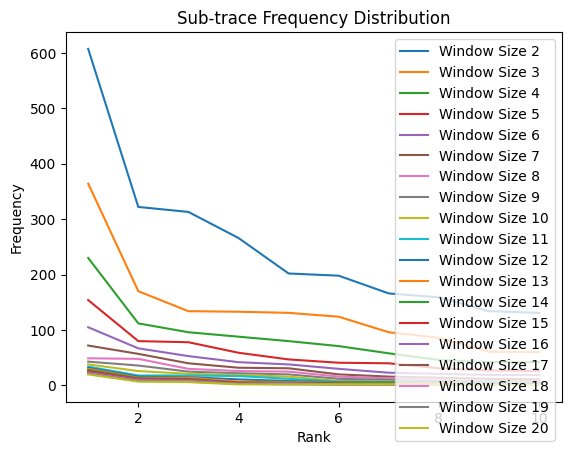

In [39]:
import matplotlib.pyplot as plt
from collections import Counter

# Function to test different window sizes
def test_window_sizes(trace_list, max_n=20):
    for window_size in range(2, max_n + 1):
        all_sub_traces = [sub_trace for trace in trace_list for sub_trace in get_sub_traces(trace, window_size)]
        sub_trace_counts = Counter(all_sub_traces)
        
        # Get top 10 frequent sub-traces
        top_counts = sorted(sub_trace_counts.values(), reverse=True)[:10]
        
        plt.plot(range(1, len(top_counts) + 1), top_counts, label=f'Window Size {window_size}')

    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title('Sub-trace Frequency Distribution')
    plt.legend()
    plt.show()

test_window_sizes(trace_list)


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Convert full traces into "sentences" (for NLP processing)
trace_sentences = [' '.join(trace) for trace in trace_list]

# Apply TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(trace_sentences)

# Cluster Traces Using K-Means
num_clusters = 5  # Change based on your data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
trace_clusters = kmeans.fit_predict(X)

# Add cluster labels to traces
clustered_traces = pd.DataFrame({'Trace': trace_sentences, 'Cluster': trace_clusters})
print(clustered_traces.sort_values(by='Cluster'))


                                                Trace  Cluster
0   11 12 11 11 11 25 23 13 13 20 11 11 20 11 11 1...        0
35  11 11 18 4 5 11 11 5 11 11 18 4 4 3 13 13 4 3 ...        0
39  11 11 11 11 11 11 11 11 11 11 11 11 13 11 11 1...        0
42                     11 11 18 13 3 13 13 3 13 20 15        0
44  11 11 11 11 11 11 11 11 11 11 11 11 13 3 13 13...        0
..                                                ...      ...
51  27 21 14 11 11 28 21 21 21 21 14 6 23 29 6 7 6...        4
50  11 11 12 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 16 ...        4
49  10 8 3 3 3 3 3 3 0 3 0 3 3 3 6 23 6 20 6 20 20...        4
83  16 16 21 16 21 16 21 16 16 21 28 26 16 16 16 2...        4
65  12 16 15 17 17 17 17 17 17 16 3 15 21 21 17 17...        4

[105 rows x 2 columns]


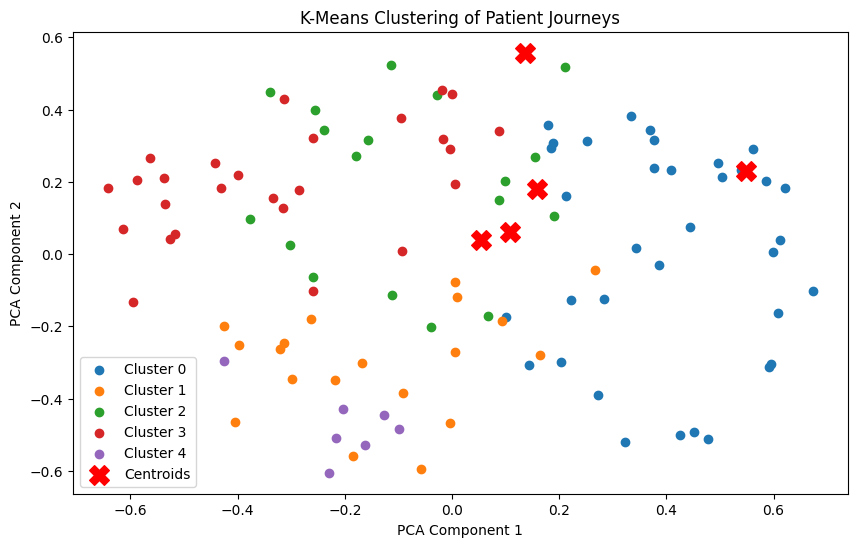

In [41]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Convert traces to "sentences"
trace_sentences = [' '.join(trace) for trace in trace_list]

# Apply Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(trace_sentences)


# Apply TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(trace_sentences)


# Apply K-Means clustering
num_clusters = 5  # Adjust based on data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Patient Journeys')
plt.legend()
plt.show()

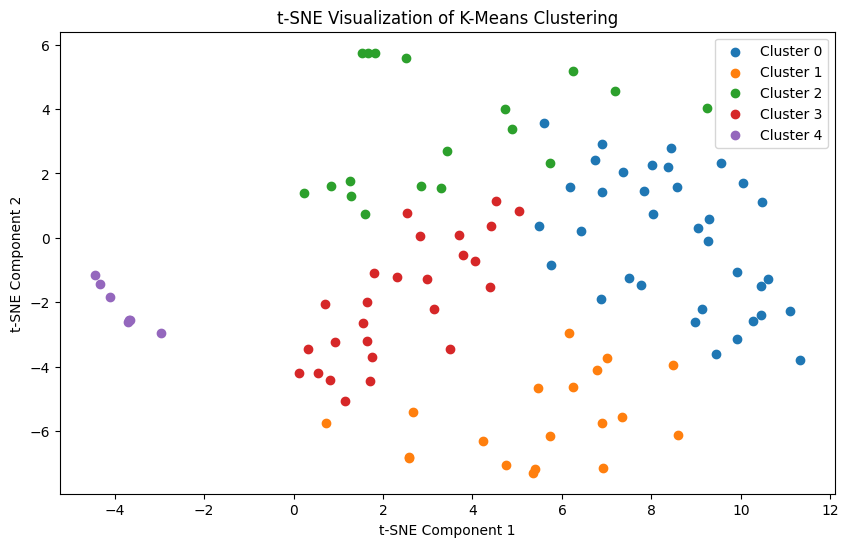

In [42]:
from sklearn.manifold import TSNE

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Plot clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(X_tsne[clusters == i, 0], X_tsne[clusters == i, 1], label=f'Cluster {i}')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of K-Means Clustering')
plt.legend()
plt.show()


In [43]:
import plotly.graph_objects as go
import numpy as np

# Ensure clusters is a NumPy array of integers
clusters = np.array(clusters, dtype=int)

# Verify the number of clusters
num_clusters = len(np.unique(clusters))

trace_sentences = np.array(trace_sentences)
# print(trace_sentences)

# Sample patient journey per cluster
sample_traces = {i: trace_sentences[clusters == i][:num_clusters] for i in range(num_clusters)}

# Create Sankey diagram
fig = go.Figure()
for i, (cluster, traces) in enumerate(sample_traces.items()):
    fig.add_trace(go.Sankey(
        node=dict(
            pad=15, thickness=20,
            label=['Start'] + [f'Step {j+1}' for j in range(len(traces[0].split()))]
        ),
        link=dict(
            source=[0] * len(traces),
            target=list(range(1, len(traces[0].split()) + 1)),
            value=[1] * len(traces)
        )
    ))

fig.update_layout(title_text="Sankey Diagram of Clustered Patient Journeys")
fig.show()


In [44]:
import plotly.graph_objects as go
from collections import Counter

# Step 1: Extract Sequences from event columns
event_columns = [col for col in feature_df.columns if 'concept:name' in col]  # Filter for event-related columns
sequences = []

# For each row in feature_df, extract the sequence of events
for _, row in feature_df.iterrows():
    events = [col.split('concept:name_')[1] for col in event_columns if row[col] == 1.0]  # Get events with 1.0 value
    sequences.append('->'.join(events))  # Join events into a sequence

# Step 2: Add sequences to the dataframe (this will be useful for visualization)
feature_df['Sequence'] = sequences

# Step 3: Get the most common sequence per cluster 
cluster_sequences = feature_df.groupby("Cluster")["Sequence"].agg(lambda x: x.mode()[0])

# Step 4: Count the occurrences of each sequence (for Sankey diagram links)
cluster_counts = Counter(cluster_sequences)

# Step 5: Prepare data for Sankey diagram (convert sequences into sources and targets)
sources, targets = [], []

for trace in cluster_sequences.values:
    steps = trace.split("->")  # Split sequence into individual steps
    for i in range(len(steps) - 1):
        sources.append(steps[i])
        targets.append(steps[i + 1])

# Convert sources and targets to indices (for Sankey diagram nodes)
all_nodes = list(set(sources + targets))  # All unique nodes (steps)
source_indices = [all_nodes.index(s) for s in sources]
target_indices = [all_nodes.index(t) for t in targets]

# Step 6: Count the frequency of each link (source -> target pair)
link_counts = Counter(zip(sources, targets))
values = [link_counts[(source, target)] for source, target in zip(sources, targets)]

# Step 7: Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(label=all_nodes),
    link=dict(source=source_indices, target=target_indices, value=values)
))

fig.show()

In [45]:
df = df_verslagen

In [46]:
gib_patients = df[df["new_topic_label"].isin([
    "Rectal_Bleeding_&_Anemia", "GI_Ulcer_&_Bleeding", "Liver_Cirrhosis_&_Varices"
])]["pseudo_id"].unique()

gib_df = df[df["pseudo_id"].isin(gib_patients)].copy()


In [47]:
gib_df = gib_df.sort_values(by=["pseudo_id", "date"])
gib_df.head()


,pseudo_id,verslagen_report_tags,verslagen_report_content,verslagen_report_start_date,date,alltext,tokens,text,Topic,Tags,Keywords,new_topic_label,verslagen_report_tags_new_topic_label,event_tag,N_Topic,case:concept:name,concept:name,time:timestamp


In [48]:
patient_paths = gib_df.groupby("pseudo_id")["new_topic_label"].apply(list)
patient_paths


C:\Users\Y.vanMegen\AppData\Local\Temp\ipykernel_25404\3973473494.py:1: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



Series([], Name: new_topic_label, dtype: object)

In [49]:
from collections import Counter

common_paths = Counter(tuple(seq[:4]) for seq in patient_paths)
common_paths


Counter()

In [50]:
import plotly.graph_objects as go

# Example data for an alluvial plot
# We assume data for 3 stages or categories: A -> B -> C

# Stage 1 (A), Stage 2 (B), Stage 3 (C)
nodes = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']

# Define the flows between nodes
# Flows from A to B, then B to C
sources = [0, 1, 0, 1, 2, 3]
targets = [2, 3, 4, 5, 4, 5]
values = [10, 20, 30, 40, 50, 60]

# Create the alluvial plot
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
    )
))

# Update layout to display the plot
fig.update_layout(title_text="Alluvial Plot Example", font_size=10)
fig.show()


In [51]:
from collections import Counter

def get_sub_traces(trace, window_size):
    """Extracts sub-traces of a given window size from a full trace."""
    return ['->'.join(trace[i:i+window_size]) for i in range(len(trace) - window_size + 1)]

# Extract unique variants (trace paths)
from pm4py.algo.filtering.log.variants import variants_filter
variants = variants_filter.get_variants(event_log_filtered)
# print('variants', variants)

# Convert traces from tuples to lists
trace_list = [list(trace) for trace in variants.keys()]
# print('trace_list', trace_list)

# Extract all sub-traces
window_size = 10 # Adjust window size as needed
all_sub_traces = [sub_trace for trace in trace_list for sub_trace in get_sub_traces(trace, window_size)]
# print('all_sub_traces', all_sub_traces)

# Count frequency of sub-traces
sub_trace_counts = Counter(all_sub_traces)

# Convert to DataFrame for sorting
import pandas as pd
sub_trace_df = pd.DataFrame(sub_trace_counts.items(), columns=['Sub-Trace', 'Count'])
sub_trace_df = sub_trace_df.sort_values(by='Count', ascending=False)

print(sub_trace_df.head(10))  # Show most common sub-traces


                                   Sub-Trace  Count
2863  21->21->21->21->21->21->21->21->21->21     38
2146            3->3->3->3->3->3->3->3->3->3     26
186        3->13->3->13->3->13->3->13->3->13     21
185        13->3->13->3->13->3->13->3->13->3     19
2407  11->11->11->11->11->11->11->11->11->11     16
2925            4->4->4->4->4->4->4->4->4->4      8
2983  17->17->17->17->17->17->17->17->17->17      8
979   20->15->20->15->20->15->20->15->20->15      7
980   15->20->15->20->15->20->15->20->15->20      7
2140            3->3->6->3->3->3->3->3->3->3      5


In [52]:
from pm4py.algo.transformation.log_to_features import algorithm as log_to_features
from sklearn.cluster import KMeans
import numpy as np

# Convert event log to feature vectors
feature_table, feature_names = log_to_features.apply(event_log_filtered, parameters={"feature_type": "frequency"})

# Convert to DataFrame
feature_df_filtered = pd.DataFrame(feature_table, columns=feature_names)

# Apply K-Means clustering (set k=3 for 3 clusters)
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
feature_df_filtered['Cluster'] = kmeans.fit_predict(feature_df_filtered)

feature_df_filtered.head()  # Show clustered patient traces


c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:357: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:357: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:357: PerformanceWarning:

DataFrame is highly fragmented.  This is usual

,"verslagen_report_tags_new_topic_label_Consult,SEH|PatientIntake","verslagen_report_tags_new_topic_label_Consult,SEH|Infusion&FluidManagement","verslagen_report_tags_new_topic_label_Consult,Overigeaantekeningen|IronDeficiency&CKD","verslagen_report_tags_new_topic_label_Consult,Polikliniek:eersteconsult|AdmissionAssessment",verslagen_report_tags_new_topic_label_Consult|SurgicalProphylaxis,"verslagen_report_tags_new_topic_label_Consult,Polikliniek:vervolgconsult|ConsultationWorkflow","verslagen_report_tags_new_topic_label_Consult,Kliniek:vervolgconsult|GIBleedAssessment","verslagen_report_tags_new_topic_label_Consult,Kliniek:eersteconsult|InitialTriage","verslagen_report_tags_new_topic_label_Consult,SEH|Intake&InitialAssessment",verslagen_report_tags_new_topic_label_SpoedeisendeHulp|GIEmergency,...,N_Topic_4,N_Topic_5,N_Topic_16,N_Topic_24,N_Topic_21,N_Topic_9,N_Topic_22,N_Topic_17,N_Topic_31,Cluster
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [53]:
import plotly.graph_objects as go
from collections import Counter

# Step 1: Extract Sequences from event columns
event_columns = [col for col in feature_df_filtered.columns if 'concept:name' in col]  # Filter for event-related columns
sequences = []

# For each row in feature_df, extract the sequence of events
for _, row in feature_df_filtered.iterrows():
    events = [col.split('concept:name_')[1] for col in event_columns if row[col] == 1.0]  # Get events with 1.0 value
    sequences.append('->'.join(events))  # Join events into a sequence

# Step 2: Add sequences to the dataframe (this will be useful for visualization)
feature_df_filtered['Sequence'] = sequences

# Step 3: Get the most common sequence per cluster 
cluster_sequences = feature_df_filtered.groupby("Cluster")["Sequence"].agg(lambda x: x.mode()[0])

# Step 4: Count the occurrences of each sequence (for Sankey diagram links)
cluster_counts = Counter(cluster_sequences)

# Step 5: Prepare data for Sankey diagram (convert sequences into sources and targets)
sources, targets = [], []

for trace in cluster_sequences.values:
    steps = trace.split("->")  # Split sequence into individual steps
    for i in range(len(steps) - 1):
        sources.append(steps[i])
        targets.append(steps[i + 1])

# Convert sources and targets to indices (for Sankey diagram nodes)
all_nodes = list(set(sources + targets))  # All unique nodes (steps)
source_indices = [all_nodes.index(s) for s in sources]
target_indices = [all_nodes.index(t) for t in targets]

# Step 6: Count the frequency of each link (source -> target pair)
link_counts = Counter(zip(sources, targets))
values = [link_counts[(source, target)] for source, target in zip(sources, targets)]

# Step 7: Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(label=all_nodes),
    link=dict(source=source_indices, target=target_indices, value=values)
))

fig.show()